## PCA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from factor_analyzer import FactorAnalyzer # Perform statistical tests before PCA
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_excel('/content/PCA India Data_Census.xlsx')

In [ ]:
df.shape

(640, 61)

In [ ]:
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [ ]:
x=df.groupby('State')['TOT_M','TOT_F'].sum()

In [ ]:
x

,TOT_M,TOT_F
State,,
Andaman & Nicobar Island,18726,28691
Andhra Pradesh,3274363,6097235
Arunachal Pradesh,50582,88066
Assam,1437268,2093432
Bihar,4025198,5405883
Chandigarh,41753,59644
Chhattisgarh,838404,1526592
Dadara & Nagar Havelli,6982,10831
Daman & Diu,13153,18706


In [ ]:
z=x['TOT_F']/(x['TOT_M'])*1000

In [ ]:
z.sort_values(ascending=False)

State
Andhra Pradesh              1862.113333
Tamil Nadu                  1825.079237
Chhattisgarh                1820.831007
Arunachal Pradesh           1741.054130
Odisha                      1737.620640
Nagaland                    1713.261502
Maharashtra                 1701.223985
Puducherry                  1691.728469
Kerala                      1663.235639
Goa                         1608.628413
Mizoram                     1603.503880
Tripura                     1597.748930
Uttarakhand                 1585.126172
Karnataka                   1567.884799
Madhya Pradesh              1563.245729
Manipur                     1559.625904
Sikkim                      1557.080708
Himachal Pradesh            1555.836907
Dadara & Nagar Havelli      1551.274706
West Bengal                 1537.645113
Andaman & Nicobar Island    1532.147816
Gujarat                     1481.823979
Jharkhand                   1466.697377
Assam                       1456.535594
Rajasthan                   1438.2

In [ ]:
x=df.groupby('Dist.Code')['TOT_M','TOT_F'].sum()

In [ ]:
z=x['TOT_F']/(x['TOT_M'])*1000

In [ ]:
z.sort_values()

Dist.Code
587    1151.992513
2      1179.576206
144    1180.201612
106    1180.761033
139    1184.830405
          ...     
391    2215.059963
546    2221.848576
625    2225.428760
398    2268.763478
547    2283.249638
Length: 640, dtype: float64

In [ ]:
df[df['Dist.Code']==587]

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
586,31,587,Lakshadweep,Lakshadweep,4445,12823,14772,1719,1587,0,...,762,359,0,0,0,0,13,7,749,352


In [ ]:
df[df['Dist.Code']==547]

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
546,28,547,Andhra Pradesh,Krishna,182404,137603,314182,14373,13978,31646,...,1050,4496,18,80,518,2961,52,189,462,1266


#### Which state has maximum and minimum literacy rate for males and females.

In [ ]:
x=df.groupby('State')['TOT_M','M_LIT'].sum()

In [ ]:
z=x['M_LIT']/x['TOT_M']

In [ ]:
z.sort_values()

State
Bihar                       0.598354
Meghalaya                   0.610784
Jharkhand                   0.665078
Uttar Pradesh               0.665239
Arunachal Pradesh           0.671484
Jammu & Kashmir             0.672121
Rajasthan                   0.703164
Assam                       0.711972
Madhya Pradesh              0.713084
Andhra Pradesh              0.724712
Dadara & Nagar Havelli      0.733171
Chhattisgarh                0.733391
Odisha                      0.737274
Punjab                      0.742014
Karnataka                   0.749135
Haryana                     0.749246
West Bengal                 0.749542
Uttarakhand                 0.755365
Manipur                     0.757676
Nagaland                    0.759543
Gujarat                     0.760907
Maharashtra                 0.788496
NCT of Delhi                0.791835
Sikkim                      0.796205
Himachal Pradesh            0.802359
Chandigarh                  0.803583
Tamil Nadu                  0.80

In [ ]:
x=df.groupby('State')['TOT_F','F_LIT'].sum()

In [ ]:
z=x['F_LIT']/x['TOT_F']

In [ ]:
z.sort_values()

State
Bihar                       0.406581
Jharkhand                   0.435937
Andhra Pradesh              0.439314
Rajasthan                   0.442871
Chhattisgarh                0.461043
Uttar Pradesh               0.463640
Dadara & Nagar Havelli      0.490075
Madhya Pradesh              0.491609
Jammu & Kashmir             0.502746
Odisha                      0.510190
Arunachal Pradesh           0.514466
Karnataka                   0.543499
Assam                       0.550760
Haryana                     0.551532
Tamil Nadu                  0.571286
West Bengal                 0.578332
Gujarat                     0.586118
Manipur                     0.589823
Uttarakhand                 0.604570
Punjab                      0.611202
Meghalaya                   0.617477
Maharashtra                 0.647051
Sikkim                      0.653018
Himachal Pradesh            0.654789
Puducherry                  0.657692
Daman & Diu                 0.669304
Nagaland                    0.66

####Which state has highest gender ratio and which has the lowest for Scheduled Castes population?

In [ ]:
x=df.groupby('State')['M_SC','F_SC'].sum()

In [ ]:
z=x['F_SC']/x['M_SC']*1000
z.sort_values()

State
NCT of Delhi                1215.758517
Meghalaya                   1246.153846
Haryana                     1265.538592
Chandigarh                  1279.608380
Punjab                      1326.875102
Mizoram                     1333.333333
Uttar Pradesh               1344.759078
Bihar                       1349.771812
Daman & Diu                 1353.728489
Jammu & Kashmir             1355.829188
Rajasthan                   1391.669675
Jharkhand                   1422.966673
Gujarat                     1423.556192
Assam                       1432.683174
Uttarakhand                 1441.813042
Himachal Pradesh            1492.932102
Sikkim                      1503.714710
Karnataka                   1526.208448
Goa                         1526.747196
West Bengal                 1531.965325
Madhya Pradesh              1533.272919
Manipur                     1542.748918
Tripura                     1550.459009
Dadara & Nagar Havelli      1563.291139
Kerala                      1599.9

### Which state has highest gender ratio and which has the lowest for age group 0-6?

In [ ]:
x=df.groupby('State')['M_06','F_06'].sum()


In [ ]:
z=x['F_06']/x['M_06']*1000
z.sort_values()

State
Haryana                      858.480597
Punjab                       869.658139
Chandigarh                   874.544128
NCT of Delhi                 889.584269
Jammu & Kashmir              892.391196
Uttarakhand                  900.009853
Himachal Pradesh             907.177823
Lakshadweep                  923.211169
Andaman & Nicobar Island     928.512397
Rajasthan                    934.733155
Gujarat                      945.291581
Tripura                      950.208787
Tamil Nadu                   953.878768
Madhya Pradesh               960.657686
Daman & Diu                  961.674528
Manipur                      964.006983
Odisha                       964.071416
Andhra Pradesh               970.265375
Nagaland                     975.936968
Karnataka                    977.466847
Puducherry                   978.837209
Kerala                       981.337471
Sikkim                       984.455959
Uttar Pradesh                985.131016
Assam                        990.0

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

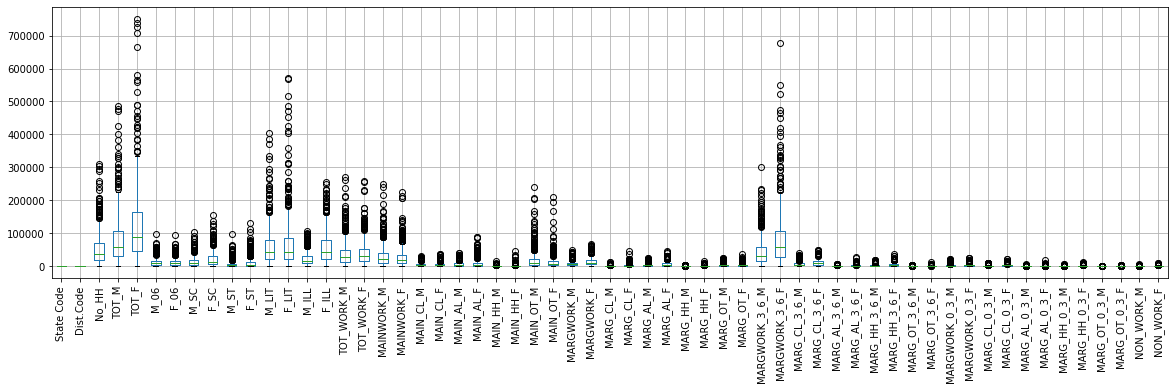

In [ ]:
df_num.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

In [ ]:
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.710782,-1.729347,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-1.710782,-1.723934,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-1.710782,-1.718521,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.710782,-1.713109,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-1.710782,-1.707696,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


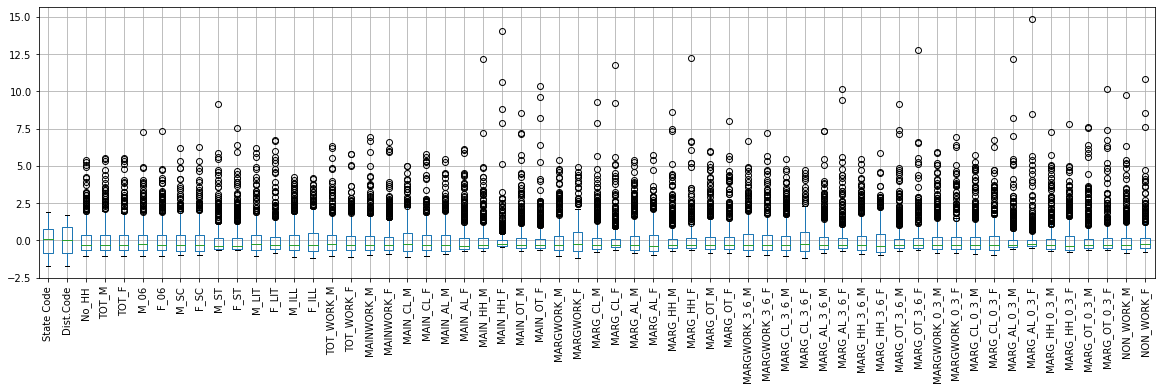

In [ ]:
df_num_scaled.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_num_scaled=df_num_scaled.drop(['State Code','Dist.Code'],axis=1)

In [ ]:
df_num_scaled.columns

Index(['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST',
       'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F',
       'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M',
       'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F',
       'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M',
       'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F',
       'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F',
       'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F',
       'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F',
       'MARG_CL_0_3_M', 'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F',
       'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F',
       'NON_WORK_M', 'NON_WORK_F'],
      dtype='object')

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

0.8039889932781813

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

0.0

In [ ]:
from sklearn.decomposition import PCA
# NOTE - we are generating only 8 PCA dimensions (dimensionality reduction from 33 to 8)
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose() # Component output

array([[-4.61726348, -4.77166187, -5.96483558, ..., -6.294625  ,
        -6.22319199, -5.89623627],
       [ 0.13811585, -0.10586536, -0.29434689, ..., -0.63812665,
        -0.67231967, -0.93716953],
       [ 0.32854489,  0.24444895,  0.36739354, ...,  0.10748279,
         0.27132545,  0.34921832],
       [ 1.54369714,  1.96321495,  0.61954271, ...,  1.36818692,
         1.14349288,  1.114861  ],
       [ 0.35373623, -0.15388429,  0.47819913, ...,  0.15374528,
         0.06043998,  0.14910357],
       [-0.42094803,  0.41730835,  0.27658052, ...,  0.14114473,
        -0.11568247, -0.15454413]])

In [ ]:
df_pca

array([[-4.61726348,  0.13811585,  0.32854489,  1.54369714,  0.35373623,
        -0.42094803],
       [-4.77166187, -0.10586536,  0.24444895,  1.96321495, -0.15388429,
         0.41730835],
       [-5.96483558, -0.29434689,  0.36739354,  0.61954271,  0.47819913,
         0.27658052],
       ...,
       [-6.294625  , -0.63812665,  0.10748279,  1.36818692,  0.15374528,
         0.14114473],
       [-6.22319199, -0.67231967,  0.27132545,  1.14349288,  0.06043998,
        -0.11568247],
       [-5.89623627, -0.93716953,  0.34921832,  1.114861  ,  0.14910357,
        -0.15454413]])

In [ ]:
pca.components_#eigen vectors

array([[ 1.56020579e-01,  1.67117635e-01,  1.65553179e-01,
         1.62192948e-01,  1.62566396e-01,  1.51357849e-01,
         1.51566500e-01,  2.72341946e-02,  2.81833150e-02,
         1.61992837e-01,  1.46872680e-01,  1.61749445e-01,
         1.65248187e-01,  1.59871988e-01,  1.45935804e-01,
         1.46200730e-01,  1.23970284e-01,  1.03127159e-01,
         7.45397856e-02,  1.13355712e-01,  7.38821590e-02,
         1.31572584e-01,  8.33826397e-02,  1.23526242e-01,
         1.11021264e-01,  1.64615479e-01,  1.55395618e-01,
         8.23885414e-02,  4.91953957e-02,  1.28598563e-01,
         1.14305073e-01,  1.40853227e-01,  1.27669598e-01,
         1.55262872e-01,  1.47286584e-01,  1.64971950e-01,
         1.61253433e-01,  1.65501611e-01,  1.55647049e-01,
         9.30142064e-02,  5.15358640e-02,  1.28576116e-01,
         1.10645843e-01,  1.39592763e-01,  1.24545909e-01,
         1.54293786e-01,  1.46285654e-01,  1.50125706e-01,
         1.40157047e-01,  5.25417829e-02,  4.17859530e-0

In [ ]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_#eigen values

array([31.81356474,  7.86942415,  4.15340812,  3.66879058,  2.20652588,
        1.93827502])

In [ ]:
var_exp = pca.explained_variance_ratio_

In [ ]:
pca.explained_variance_ratio_

array([0.55726063, 0.13784435, 0.07275295, 0.06426418, 0.03865049,
       0.03395169])

In [ ]:
cum_var=np.cumsum(pca.explained_variance_ratio_)
cum_var

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 ])

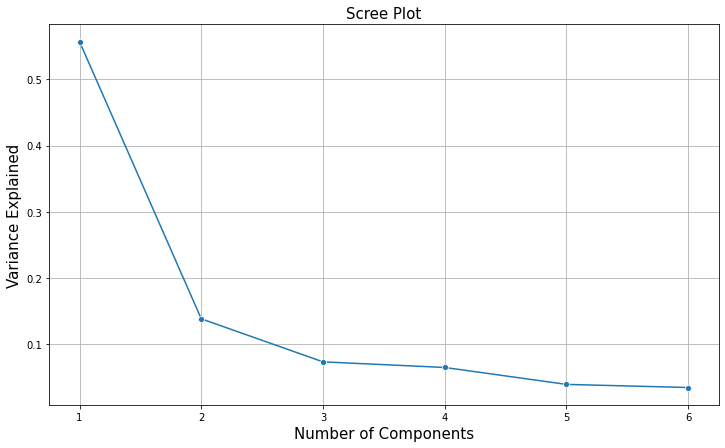

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

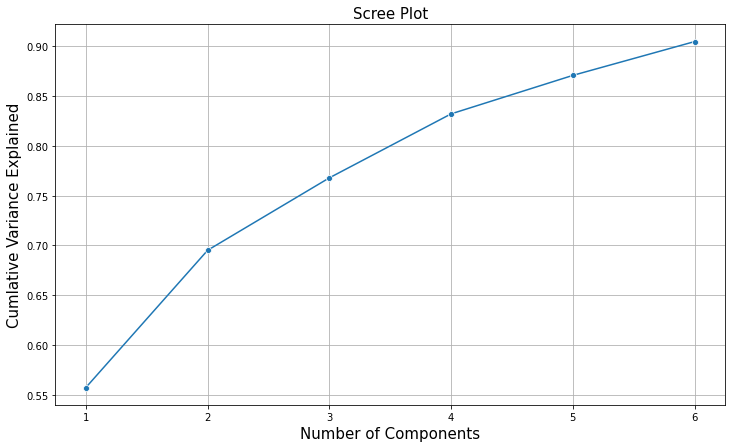

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(y=cum_var,x=range(1,len(cum_var)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Cumlative Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

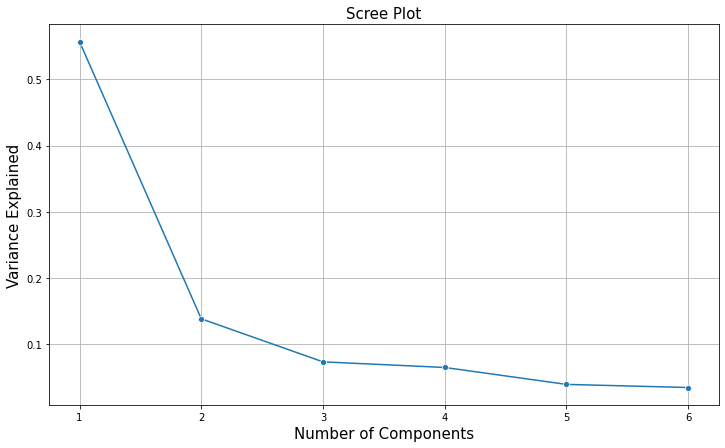

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [ ]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_num_scaled))
df_pca_loading.shape

(6, 57)

In [ ]:
df_pca_loading.T

,0,1,2,3,4,5
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465


In [ ]:
df_extracted_loadings = pd.DataFrame(pca.components_.T,
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
                                    index = df_num_scaled.columns)

In [ ]:
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]

In [ ]:
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465


In [ ]:
df_selected1=df_selected.copy()

In [ ]:

pd.DataFrame(df_selected1.PC6.sort_values(
...
...     ascending=False
... ))

,PC6
MAIN_HH_F,0.422309
MARG_OT_3_6_F,0.384552
MARG_HH_F,0.365112
MARG_OT_0_3_F,0.295600
F_ST,0.225531
M_ST,0.222591
MAIN_HH_M,0.174465
MAINWORK_F,0.123832
TOT_WORK_F,0.105162
MAIN_CL_F,0.102951


In [ ]:
pd.DataFrame(df_selected1.PC6.sort_values(
...
...     ascending=True
... ))

,PC6
M_06,-0.157957
F_06,-0.154436
MARG_HH_3_6_M,-0.144061
MARG_AL_M,-0.141605
MARGWORK_3_6_M,-0.136253
MARG_HH_0_3_M,-0.124209
M_ILL,-0.115234
MARGWORK_3_6_F,-0.106900
MARG_HH_0_3_F,-0.105530
MARG_CL_3_6_M,-0.096708


In [ ]:
from matplotlib.patches import Rectangle

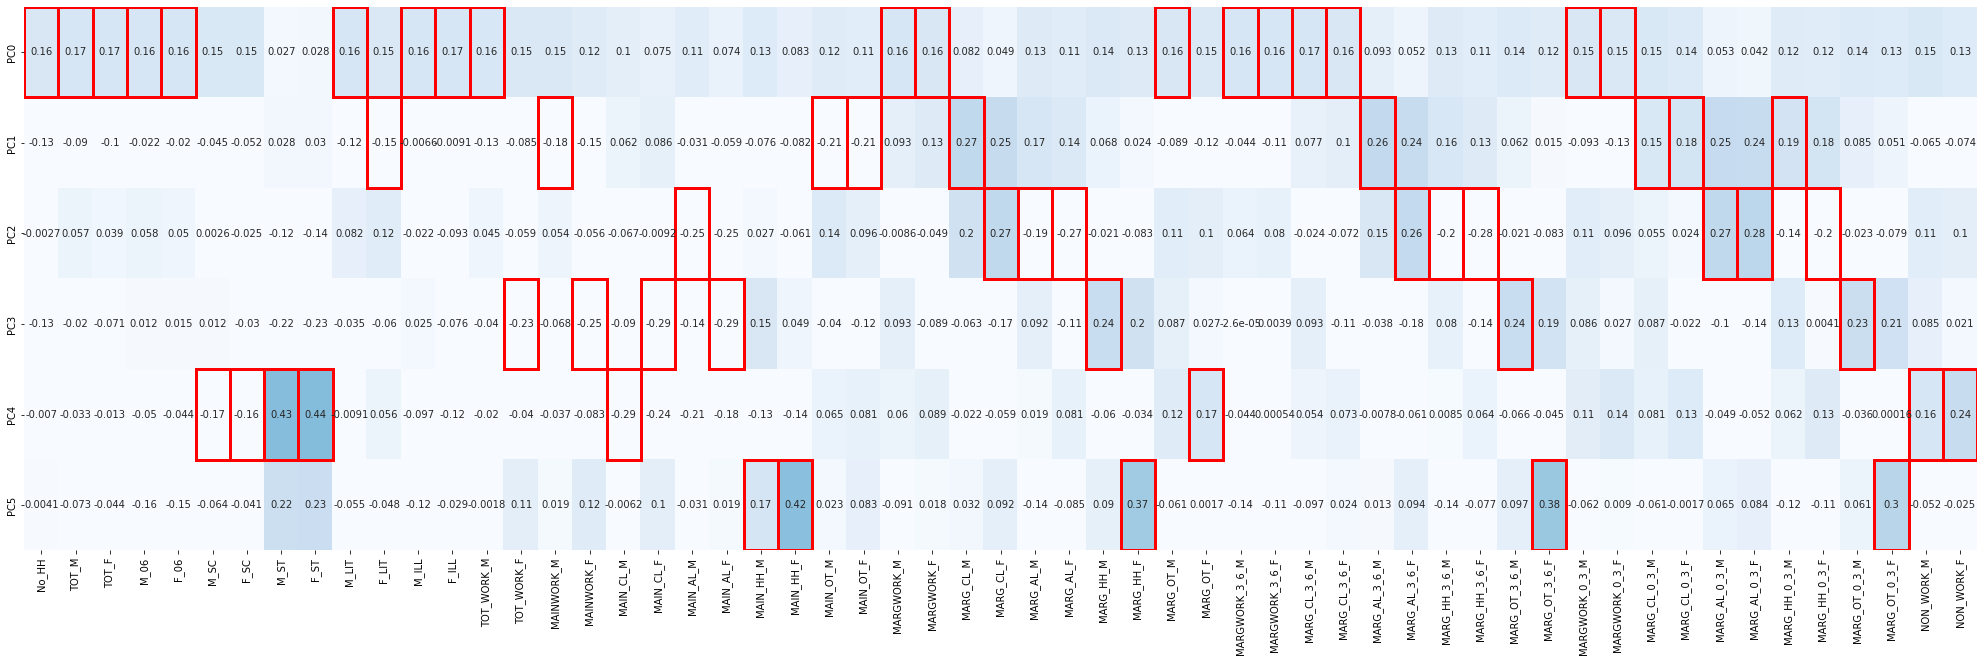

In [ ]:
fig,ax = plt.subplots(figsize=(35, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5'])

column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))

In [ ]:
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(df_num_scaled)

In [ ]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,-4.617263,0.138116,0.328545,1.543697,0.353736,-0.420948
1,-4.771662,-0.105865,0.244449,1.963215,-0.153884,0.417308
2,-5.964836,-0.294347,0.367394,0.619543,0.478199,0.276581
3,-6.280796,-0.500384,0.212701,1.074515,0.300799,0.051157
4,-4.478566,0.894154,1.078277,0.535557,0.804065,0.341678
...,...,...,...,...,...,...
635,-6.262088,-0.854414,0.242575,1.174113,0.063816,-0.159470
636,-5.767714,-0.900436,0.168051,1.102774,0.055179,-0.156458
637,-6.294625,-0.638127,0.107483,1.368187,0.153745,0.141145
638,-6.223192,-0.672320,0.271325,1.143493,0.060440,-0.115682


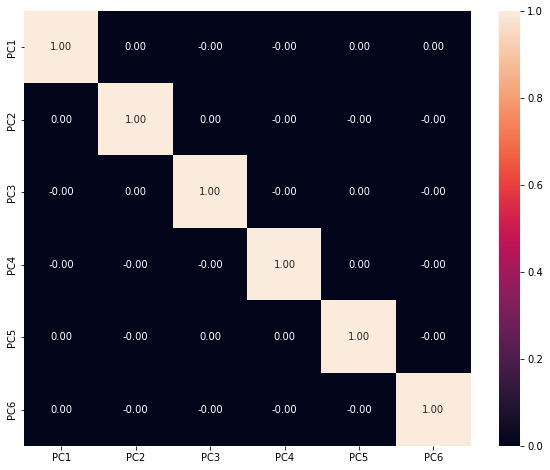

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

In [ ]:
df_selected1=df_selected.PC1.round(decimals = 2)

In [ ]:
df_selected1=df_selected1.sort_values(ascending=False)

In [ ]:
dict1 = df_selected1.to_dict()
print(dict1)

{'TOT_F': 0.17, 'MARG_CL_3_6_M': 0.17, 'TOT_M': 0.17, 'F_ILL': 0.17, 'No_HH': 0.16, 'M_ILL': 0.16, 'MARG_CL_3_6_F': 0.16, 'MARGWORK_3_6_F': 0.16, 'MARGWORK_3_6_M': 0.16, 'MARG_OT_M': 0.16, 'MARGWORK_F': 0.16, 'TOT_WORK_M': 0.16, 'M_LIT': 0.16, 'F_06': 0.16, 'M_06': 0.16, 'MARGWORK_M': 0.16, 'F_LIT': 0.15, 'TOT_WORK_F': 0.15, 'MAINWORK_M': 0.15, 'MARG_OT_F': 0.15, 'NON_WORK_M': 0.15, 'MARG_CL_0_3_M': 0.15, 'MARGWORK_0_3_F': 0.15, 'MARGWORK_0_3_M': 0.15, 'F_SC': 0.15, 'M_SC': 0.15, 'MARG_OT_0_3_M': 0.14, 'MARG_OT_3_6_M': 0.14, 'MARG_CL_0_3_F': 0.14, 'MARG_HH_M': 0.14, 'MARG_HH_3_6_M': 0.13, 'MARG_OT_0_3_F': 0.13, 'NON_WORK_F': 0.13, 'MARG_HH_F': 0.13, 'MARG_AL_M': 0.13, 'MAIN_HH_M': 0.13, 'MARG_HH_0_3_M': 0.12, 'MAIN_OT_M': 0.12, 'MAINWORK_F': 0.12, 'MARG_OT_3_6_F': 0.12, 'MARG_HH_0_3_F': 0.12, 'MAIN_OT_F': 0.11, 'MARG_HH_3_6_F': 0.11, 'MARG_AL_F': 0.11, 'MAIN_AL_M': 0.11, 'MAIN_CL_M': 0.1, 'MARG_AL_3_6_M': 0.09, 'MARG_CL_M': 0.08, 'MAIN_HH_F': 0.08, 'MAIN_AL_F': 0.07, 'MAIN_CL_F': 0.07,

In [ ]:
result = str(dict1)

In [ ]:
result

"{'TOT_F': 0.17, 'MARG_CL_3_6_M': 0.17, 'TOT_M': 0.17, 'F_ILL': 0.17, 'No_HH': 0.16, 'M_ILL': 0.16, 'MARG_CL_3_6_F': 0.16, 'MARGWORK_3_6_F': 0.16, 'MARGWORK_3_6_M': 0.16, 'MARG_OT_M': 0.16, 'MARGWORK_F': 0.16, 'TOT_WORK_M': 0.16, 'M_LIT': 0.16, 'F_06': 0.16, 'M_06': 0.16, 'MARGWORK_M': 0.16, 'F_LIT': 0.15, 'TOT_WORK_F': 0.15, 'MAINWORK_M': 0.15, 'MARG_OT_F': 0.15, 'NON_WORK_M': 0.15, 'MARG_CL_0_3_M': 0.15, 'MARGWORK_0_3_F': 0.15, 'MARGWORK_0_3_M': 0.15, 'F_SC': 0.15, 'M_SC': 0.15, 'MARG_OT_0_3_M': 0.14, 'MARG_OT_3_6_M': 0.14, 'MARG_CL_0_3_F': 0.14, 'MARG_HH_M': 0.14, 'MARG_HH_3_6_M': 0.13, 'MARG_OT_0_3_F': 0.13, 'NON_WORK_F': 0.13, 'MARG_HH_F': 0.13, 'MARG_AL_M': 0.13, 'MAIN_HH_M': 0.13, 'MARG_HH_0_3_M': 0.12, 'MAIN_OT_M': 0.12, 'MAINWORK_F': 0.12, 'MARG_OT_3_6_F': 0.12, 'MARG_HH_0_3_F': 0.12, 'MAIN_OT_F': 0.11, 'MARG_HH_3_6_F': 0.11, 'MARG_AL_F': 0.11, 'MAIN_AL_M': 0.11, 'MAIN_CL_M': 0.1, 'MARG_AL_3_6_M': 0.09, 'MARG_CL_M': 0.08, 'MAIN_HH_F': 0.08, 'MAIN_AL_F': 0.07, 'MAIN_CL_F': 0.07

In [ ]:
result = result.replace(":", "  *    ")

In [ ]:
result = result.replace(",", "        +        ")

In [ ]:
result

"{'TOT_F'  *     0.17        +         'MARG_CL_3_6_M'  *     0.17        +         'TOT_M'  *     0.17        +         'F_ILL'  *     0.17        +         'No_HH'  *     0.16        +         'M_ILL'  *     0.16        +         'MARG_CL_3_6_F'  *     0.16        +         'MARGWORK_3_6_F'  *     0.16        +         'MARGWORK_3_6_M'  *     0.16        +         'MARG_OT_M'  *     0.16        +         'MARGWORK_F'  *     0.16        +         'TOT_WORK_M'  *     0.16        +         'M_LIT'  *     0.16        +         'F_06'  *     0.16        +         'M_06'  *     0.16        +         'MARGWORK_M'  *     0.16        +         'F_LIT'  *     0.15        +         'TOT_WORK_F'  *     0.15        +         'MAINWORK_M'  *     0.15        +         'MARG_OT_F'  *     0.15        +         'NON_WORK_M'  *     0.15        +         'MARG_CL_0_3_M'  *     0.15        +         'MARGWORK_0_3_F'  *     0.15        +         'MARGWORK_0_3_M'  *     0.15        +         'F_SC'  *     

##### {'TOT_F'  *     0.17        +         'MARG_CL_3_6_M'  *     0.17        +         'TOT_M'  *     0.17        +         'F_ILL'  *     0.17        +         'No_HH'  *     0.16        +         'M_ILL'  *     0.16        +         'MARG_CL_3_6_F'  *     0.16        +         'MARGWORK_3_6_F'  *     0.16        +         'MARGWORK_3_6_M'  *     0.16        +         'MARG_OT_M'  *     0.16        +         'MARGWORK_F'  *     0.16        +         'TOT_WORK_M'  *     0.16        +         'M_LIT'  *     0.16        +         'F_06'  *     0.16        +         'M_06'  *     0.16        +         'MARGWORK_M'  *     0.16        +         'F_LIT'  *     0.15        +         'TOT_WORK_F'  *     0.15        +         'MAINWORK_M'  *     0.15        +         'MARG_OT_F'  *     0.15        +         'NON_WORK_M'  *     0.15        +         'MARG_CL_0_3_M'  *     0.15        +         'MARGWORK_0_3_F'  *     0.15        +         'MARGWORK_0_3_M'  *     0.15        +         'F_SC'  *     0.15        +         'M_SC'  *     0.15        +         'MARG_OT_0_3_M'  *     0.14        +         'MARG_OT_3_6_M'  *     0.14        +         'MARG_CL_0_3_F'  *     0.14        +         'MARG_HH_M'  *     0.14        +         'MARG_HH_3_6_M'  *     0.13        +         'MARG_OT_0_3_F'  *     0.13        +         'NON_WORK_F'  *     0.13        +         'MARG_HH_F'  *     0.13        +         'MARG_AL_M'  *     0.13        +         'MAIN_HH_M'  *     0.13        +         'MARG_HH_0_3_M'  *     0.12        +         'MAIN_OT_M'  *     0.12        +         'MAINWORK_F'  *     0.12        +         'MARG_OT_3_6_F'  *     0.12        +         'MARG_HH_0_3_F'  *     0.12        +         'MAIN_OT_F'  *     0.11        +         'MARG_HH_3_6_F'  *     0.11        +         'MARG_AL_F'  *     0.11        +         'MAIN_AL_M'  *     0.11        +         'MAIN_CL_M'  *     0.1        +         'MARG_AL_3_6_M'  *     0.09        +         'MARG_CL_M'  *     0.08        +         'MAIN_HH_F'  *     0.08        +         'MAIN_AL_F'  *     0.07        +         'MAIN_CL_F'  *     0.07        +         'MARG_AL_0_3_M'  *     0.05        +         'MARG_AL_3_6_F'  *     0.05        +         'MARG_CL_F'  *     0.05        +         'MARG_AL_0_3_F'  *     0.04        +         'F_ST'  *     0.03        +         'M_ST'  *     0.03}